# 📝 Exercise M6.04

The aim of the exercise is to get familiar with the histogram
gradient-boosting in scikit-learn. Besides, we will use this model within a
cross-validation framework in order to inspect internal parameters found via
grid-search.

We will use the California housing dataset.

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

First, create a histogram gradient boosting regressor. You can set the trees
number to be large, and configure the model to use early-stopping.

In [2]:
# Write your code here.
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True, random_state=0)

We will use a grid-search to find some optimal parameter for this model. In
this grid-search, you should search for the following parameters:

* `max_depth: [3, 8]`;
* `max_leaf_nodes: [15, 31]`;
* `learning_rate: [0.1, 1]`.

Feel free to explore the space with additional values. Create the grid-search
providing the previous gradient boosting instance as the model.

In [3]:
# Write your code here.
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3, 8],
              "max_leaf_nodes": [15, 31],
              "learning_rate": [0.1, 1]}

hgbr_grid = GridSearchCV(hgbr, param_grid=param_grid, n_jobs=2, cv=5)

Finally, we will run our experiment through cross-validation. In this regard,
define a 5-fold cross-validation. Besides, be sure to shuffle the data.
Subsequently, use the function `sklearn.model_selection.cross_validate` to run
the cross-validation. You should also set `return_estimator=True`, so that we
can investigate the inner model trained via cross-validation.

In [4]:
# Write your code here.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)

cv_results = cross_validate(hgbr_grid, data, target, cv=cv, return_estimator=True, n_jobs=2)


We can check the indices of the splits by using the following code,

Code 1

In [5]:
for i, (train_index, test_index) in enumerate(cv.split(data)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    0     1     2 ... 20637 20638 20639]
  Test:  index=[    7     8    12 ... 20626 20629 20630]
Fold 1:
  Train: index=[    0     1     2 ... 20636 20637 20638]
  Test:  index=[    9    20    27 ... 20610 20617 20639]
Fold 2:
  Train: index=[    1     4     6 ... 20633 20634 20639]
  Test:  index=[    0     2     3 ... 20636 20637 20638]
Fold 3:
  Train: index=[    0     2     3 ... 20637 20638 20639]
  Test:  index=[    1     4     6 ... 20624 20632 20633]
Fold 4:
  Train: index=[    0     1     2 ... 20637 20638 20639]
  Test:  index=[   10    13    19 ... 20620 20622 20634]


Code 2

In [6]:
Random_Iter = cv.split(data)
for i in range(cv.get_n_splits()):
    print(next(Random_Iter))

(array([    0,     1,     2, ..., 20637, 20638, 20639]), array([    7,     8,    12, ..., 20626, 20629, 20630]))
(array([    0,     1,     2, ..., 20636, 20637, 20638]), array([    9,    20,    27, ..., 20610, 20617, 20639]))
(array([    1,     4,     6, ..., 20633, 20634, 20639]), array([    0,     2,     3, ..., 20636, 20637, 20638]))
(array([    0,     2,     3, ..., 20637, 20638, 20639]), array([    1,     4,     6, ..., 20624, 20632, 20633]))
(array([    0,     1,     2, ..., 20637, 20638, 20639]), array([   10,    13,    19, ..., 20620, 20622, 20634]))


Now that we got the cross-validation results, print out the mean and standard
deviation score.

In [7]:
# Write your code here.
print(f"R2 score with cross-validation: {cv_results['test_score'].mean():.3f} ± "
      f"{cv_results['test_score'].std():.3f}")

R2 score with cross-validation: 0.839 ± 0.006


Then inspect the `estimator` entry of the results and check the best
parameters values. Besides, check the number of trees used by the model.

In [9]:
# Write your code here.
for estimator in cv_results["estimator"]:
    print(estimator.best_params_)
    print(estimator.best_estimator_.n_iter_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 15}
528
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 15}
447
{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 15}
576
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 15}
290
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 15}
414


Inspect the results of the inner CV for each estimator of the outer CV.
Aggregate the mean test score for each parameter combination and make a box
plot of these scores.

In [34]:
# Write your code here.
import pandas as pd

index_columns = [f"param_{name}" for name in param_grid.keys()]
columns = index_columns + ["mean_test_score"]

inner_cv_results = []
for cv_idx, estimator in enumerate(cv_results["estimator"]):
    search_cv_results = pd.DataFrame(estimator.cv_results_)
    search_cv_results = search_cv_results[columns].set_index(index_columns)
    search_cv_results = search_cv_results.rename(
        columns={"mean_test_score": f"CV {cv_idx}"}
    )
    inner_cv_results.append(search_cv_results)
inner_cv_results = pd.concat(inner_cv_results, axis=1).T

inner_cv_results

param_max_depth              3                   8                   3  \
param_max_leaf_nodes        15        31        15        31        15   
param_learning_rate        0.1       0.1       0.1       0.1         1   
CV 0                  0.696279  0.696279  0.695167  0.689567  0.594949   
CV 1                  0.693432  0.693432  0.709576  0.692818  0.635830   
CV 2                  0.703452  0.703452  0.699527  0.689627  0.609780   
CV 3                  0.675031  0.675031  0.686113  0.683151  0.601173   
CV 4                  0.678721  0.678721  0.696453  0.690846  0.621719   

param_max_depth                        8            
param_max_leaf_nodes        31        15        31  
param_learning_rate          1         1         1  
CV 0                  0.594949  0.594929  0.542924  
CV 1                  0.635830  0.574798  0.548045  
CV 2                  0.609780  0.587401  0.557469  
CV 3                  0.601173  0.599924  0.537000  
CV 4                  0.621719  0.586566  0.559147

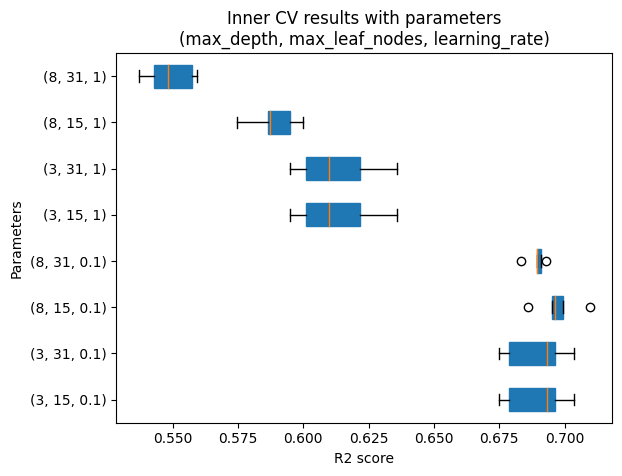

In [49]:
import matplotlib.pyplot as plt

color = {"boxes": "tab:blue", "whiskers": "black", "medians": "tab:orange", "caps": "black"}
inner_cv_results.plot.box(vert=False, color=color, patch_artist=True)
plt.xlabel("R2 score")
plt.ylabel("Parameters")
_ = plt.title(
    "Inner CV results with parameters\n"
    "(max_depth, max_leaf_nodes, learning_rate)"
)